In [48]:
df = pd.read_parquet('walmart.parquet').sample(n=100)
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
6655,5,379585,1,32,1,203007,58.15,5.612406,3.369333,0.533952,194.691838,3.727157,8.543667,0.636128


In [49]:
X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']

In [50]:
np.unique(y)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [51]:
# One of non-linear embedding in sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [52]:
tf = tsne.fit_transform(X)

In [53]:
tsne.kl_divergence_

0.12749622762203217

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

Text(0.5, 1.0, 'tSNE')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

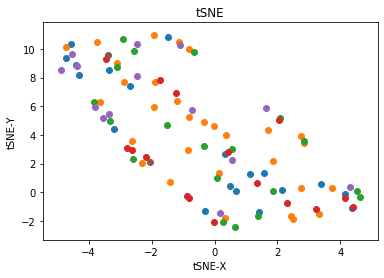

In [54]:
from matplotlib import pyplot as plt

for label in np.unique(y):
    plt.scatter(tf[y == label, 0], tf[y == label, 1])
    plt.title('tSNE')
    plt.xlabel('tSNE-X')
    plt.ylabel('tSNE-Y')
    
plt.show()

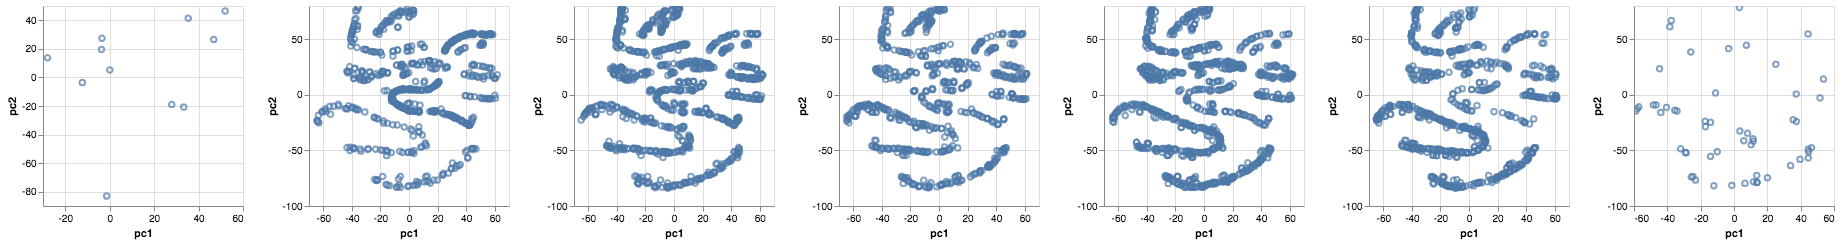

In [8]:
import altair as alt

plots = []

for label in np.unique(y):
    tse = pd.DataFrame({'tSNE-X': tf[y == label, 0], 'tSNE-Y': tf[y == label, 1]})
    tse = alt.Chart(tse).mark_point().encode(x='tSNE-X', y='tSNE-Y').properties(width=200, height=200).interactive() 
    tse.append(plot)

alt.hconcat(*plots)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'tSNE (perplexity=30 n_iter=1000)')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

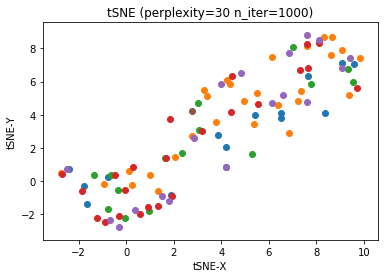

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=250, n_iter_without_progress=300, perplexity=10,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'tSNE (perplexity=10 n_iter=250)')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

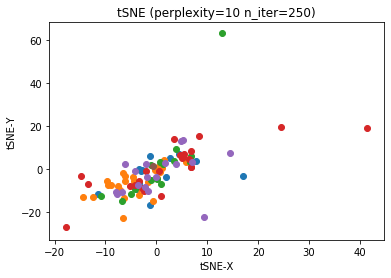

In [16]:
# https://deepage.net/machine_learning/2017/03/08/tsne.html
from sklearn.manifold import TSNE

for param in [(30, 1000), (10, 250)]:
    tsne = TSNE(n_components=2, random_state=0, perplexity=param[0], n_iter=param[1])
    tsne.fit(X)
    tf = tsne.fit_transform(X)
    
    for label in np.unique(y):
        plt.scatter(tf[y == label, 0], tf[y == label, 1])
    
    plt.title('tSNE (perplexity=%s n_iter=%s)' % (param[0], param[1]))
    plt.xlabel('tSNE-X')
    plt.ylabel('tSNE-Y')
    plt.show()

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=10,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'p=10 n=1000')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=20,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'p=20 n=1000')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'p=30 n=1000')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'p=40 n=1000')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=50,
     random_state=0, verbose=0)

Text(0.5, 1.0, 'p=50 n=1000')

Text(0.5, 0, 'tSNE-X')

Text(0, 0.5, 'tSNE-Y')

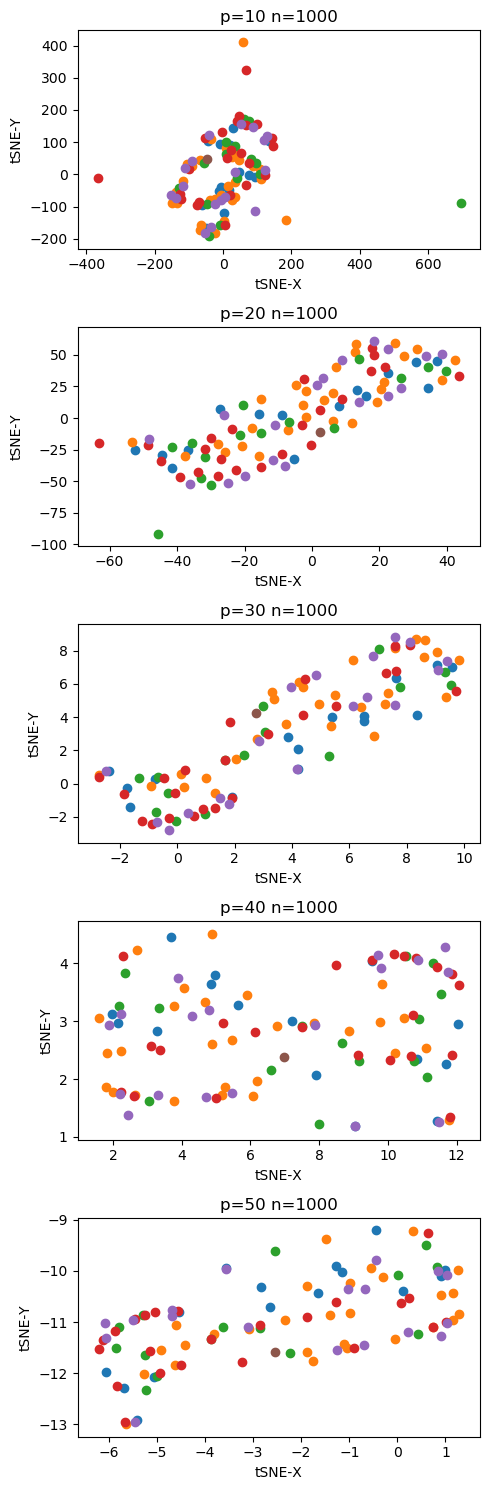

In [43]:
# https://deepage.net/machine_learning/2017/03/08/tsne.html
from sklearn.manifold import TSNE

params = [(10, 1000), (20, 1000), (30, 1000), (40, 1000), (50, 1000)]

fig = plt.figure(figsize=(5, 15), dpi=100)
for i in range(len(params)):
    tsne = TSNE(n_components=2, random_state=0, perplexity=params[i][0], n_iter=params[i][1])
    tsne.fit(X)
    tf = tsne.fit_transform(X)

    ax = fig.add_subplot(len(params), 1, i + 1)
    for label in np.unique(y):
        ax.scatter(tf[y == label, 0], tf[y == label, 1])
        
    ax.set_title('p=%s n=%s' % (params[i][0], params[i][1]))
    ax.set_xlabel('tSNE-X')
    ax.set_ylabel('tSNE-Y')

plt.tight_layout()
plt.show()

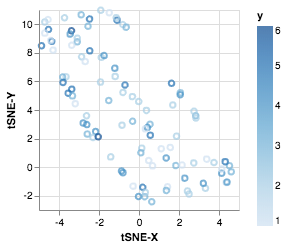

In [65]:
import altair as alt

tsedf = pd.DataFrame(data=tf, columns=['tSNE-X', 'tSNE-Y'])
tsedf['y'] = y.reset_index(drop=True)
alt.Chart(tsedf).mark_point().encode(x='tSNE-X', y='tSNE-Y', color='y').properties(width=200, height=200)